In [4]:
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
import pandas as pd
%matplotlib inline
from analyze_sumfiles import get_sumfile

In [9]:
datpath_k = "/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002/69002.dat"
datpath = "/home/michele/sim/MoRIA/sim69002/69002.dat"

In [10]:
a = get_sumfile(datpath)
k = get_sumfile(datpath_k)

In [32]:
# a.head()
k.columns

Index(['time', 'redshift', 'ngas', 'nstar', 'ndark', 'Mgas', 'Mstar', 'Mdark',
       'MHI', 'r_e_L', 'r_e_M', 'r_e_M_DM', 'flatStar', 'flatDM',
       'velDisp_star', 'velDisp_DM', 'kinE_star', 'kinE_DM', 'bound_star',
       'bound_DM', 'SFR', 'M_U', 'M_B', 'M_V', 'M_R', 'M_I', 'M_J', 'M_H',
       'M_K', 'metall_star', 'FeH_star', 'MgFe_star', 'metall_lum', 'FeH_lum',
       'age_lum', 'Mgas_re', 'Mstar_re', 'Mdark_re', 'rcom_x', 'rcom_y',
       'rcom_z', 'vcom_x', 'vcom_y', 'vcom_z', 'L_x', 'L_y', 'L_z', 'I0',
       'sig(I0)', 'r0', 'sig(r0)', 'n', 'sig(n)', 'mu0', 'sig(mu0)', 'gas<1Re',
       'gas<2Re', 'gas<3Re', 'gas<4Re', 'gas<5Re', 'gas<10Re', 'gas<30Re',
       'gas_all', 'DM<1Re', 'DM<2Re', 'DM<3Re', 'DM<4Re', 'DM<5Re', 'DM<10Re',
       'DM<30Re', 'DM_all'],
      dtype='object')

In [12]:
a.head()

,time,redshift,ngas,nstar,ndark,Mgas,Mstar,Mdark,MHI,r_e_L,...,gas<30Re,gas_all,DM<1Re,DM<2Re,DM<3Re,DM<4Re,DM<5Re,DM<10Re,DM<30Re,DM_all
#,,,,,,,,,,,,,,,,,,,,,
0,5.00,1.1565,928930.0,6580,935510.0,9842.8,50.489,46777,436.57,1.2665,...,0.088615,1,0.002488,0.011526,0.023902,0.038089,0.052440,0.11811,NaN,NaN
1,5.00,1.1637,928930.0,6580,935510.0,9842.8,50.489,46777,442.17,1.2655,...,0.088614,1,0.002495,0.011526,0.023901,0.038088,0.052444,0.11811,NaN,NaN
2,5.05,1.1492,928880.0,6626,935510.0,9842.3,50.931,46777,443.86,1.4355,...,0.088879,1,0.001876,0.010327,0.023757,0.038032,0.052106,0.11225,NaN,NaN
3,5.10,1.1349,928790.0,6717,935510.0,9841.5,51.766,46777,461.22,1.4615,...,0.089164,1,0.001836,0.009524,0.021601,0.035404,0.049436,0.10806,NaN,NaN
4,5.15,1.1208,928730.0,6778,935510.0,9841.0,52.299,46777,457.97,1.1925,...,0.089582,1,0.002103,0.010216,0.021571,0.034539,0.048017,0.10655,NaN,NaN


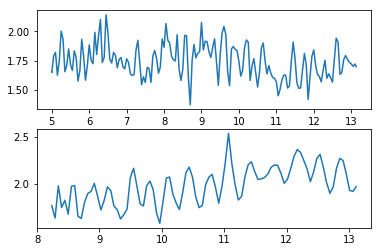

In [13]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(a.time, a.r_e_M)
ax2.plot(k.time, k.r_e_M)


In [43]:
def plot_property(a, k, prop):
    fig, ax = plt.subplots()
    ax.plot(a.time, a[prop], "r", label="MoRIA")
    k2 = np.interp(a.time, k.time, k[prop])
    ax.plot(a.time[:-1], k2[:-1], label="Kicked")
    ax.set_title(prop)
    fig.legend()

In [44]:
# k[['time','SFR', 'Mstar']]

In [ ]:
plot_property(a, k, 'Mstar')

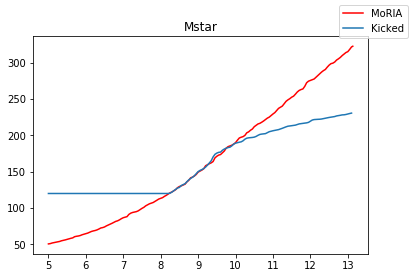

In [47]:
plot_property(a, k, 'Mstar')

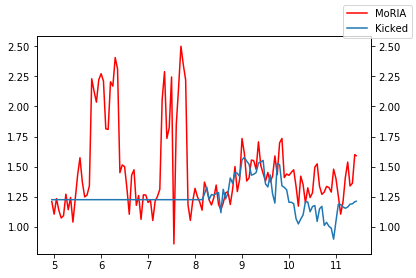

In [38]:
fig, ax = plt.subplots()
ax.plot(a.time, a.r_e_M, "r", label="MoRIA")
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
k2 = np.interp(a.time, k.time, k.r_e_M)
ax2.plot(a.time, k2, label="Kicked")
fig.legend();

In [33]:
ax.get_ylim()

(0.77750000000000008, 2.5814999999999997)